###Реализация и применение
###алгоритма для построения
###векторных представлений в
###графах знаний.

In [ ]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.4 MB/s eta 0:00:00


$∑_(i,j) (A[i, j] - U[i] * V[j]^T)^2$

$U_grad[i] = ∑_j (A[i, j] - U[i] * V[j]^T) * V[j]$

$V_grad[j] = ∑_i (A[i, j] - U[i] * V[j]^T) * U[i]$


$U -=$ learning_rate $* U_grad$

$V -=$ learning_rate $* V_grad$


In [ ]:
import random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.decomposition import PCA

In [ ]:
users = {
    'User1': {'age': 25, 'gender': 'male'},
    'User2': {'age': 30, 'gender': 'female'},
    'User3': {'age': 35, 'gender': 'male'},
    'User4': {'age': 40, 'gender': 'female'},
    'User5': {'age': 45, 'gender': 'male'},
    'User6': {'age': 28, 'gender': 'male'},
    'User7': {'age': 33, 'gender': 'female'},
    'User8': {'age': 36, 'gender': 'male'},
    'User9': {'age': 41, 'gender': 'female'},
    'User10': {'age': 46, 'gender': 'male'},
    'User11': {'age': 27, 'gender': 'female'},
    'User12': {'age': 32, 'gender': 'male'},
    'User13': {'age': 37, 'gender': 'female'},
    'User14': {'age': 42, 'gender': 'male'},
    'User15': {'age': 47, 'gender': 'female'},
    'User16': {'age': 29, 'gender': 'male'},
    'User17': {'age': 34, 'gender': 'female'},
    'User18': {'age': 39, 'gender': 'male'},
    'User19': {'age': 44, 'gender': 'female'},
    'User20': {'age': 49, 'gender': 'male'},
    'User21': {'age': 26, 'gender': 'female'},
    'User22': {'age': 31, 'gender': 'male'},
    'User23': {'age': 36, 'gender': 'female'},
    'User24': {'age': 41, 'gender': 'male'},
    'User25': {'age': 46, 'gender': 'female'},
    'User26': {'age': 28, 'gender': 'male'},
    'User27': {'age': 33, 'gender': 'female'},
    'User28': {'age': 38, 'gender': 'male'},
    'User29': {'age': 43, 'gender': 'female'},
    'User30': {'age': 48, 'gender': 'male'},
}

films = {
    'Film1': {'genre': 'action', 'year': 2000},
    'Film2': {'genre': 'comedy', 'year': 2005},
    'Film3': {'genre': 'drama', 'year': 2010},
    'Film4': {'genre': 'thriller', 'year': 2015},
    'Film5': {'genre': 'romance', 'year': 2020},
    'Film6': {'genre': 'sci-fi', 'year': 2020},
    'Film7': {'genre': 'horror', 'year': 2018},
    'Film8': {'genre': 'fantasy', 'year': 2017},
    'Film9': {'genre': 'mystery', 'year': 2019},
    'Film10': {'genre': 'animation', 'year': 2016},
    'Film11': {'genre': 'action', 'year': 2003},
    'Film12': {'genre': 'comedy', 'year': 2008},
    'Film13': {'genre': 'drama', 'year': 2012},
    'Film14': {'genre': 'thriller', 'year': 2017},
    'Film15': {'genre': 'romance', 'year': 2022},
    'Film16': {'genre': 'sci-fi', 'year': 2023},
    'Film17': {'genre': 'horror', 'year': 2019},
    'Film18': {'genre': 'fantasy', 'year': 2016},
    'Film19': {'genre': 'mystery', 'year': 2020},
    'Film20': {'genre': 'animation', 'year': 2015},
    'Film21': {'genre': 'action', 'year': 2001},
    'Film22': {'genre': 'comedy', 'year': 2006},
    'Film23': {'genre': 'drama', 'year': 2011},
    'Film24': {'genre': 'thriller', 'year': 2016},
    'Film25': {'genre': 'romance', 'year': 2021},
    'Film26': {'genre': 'sci-fi', 'year': 2024},
    'Film27': {'genre': 'horror', 'year': 2020},
    'Film28': {'genre': 'fantasy', 'year': 2018},
    'Film29': {'genre': 'mystery', 'year': 2021},
    'Film30': {'genre': 'animation', 'year': 2017},
    'Film31': {'genre': 'action', 'year': 2002},
    'Film32': {'genre': 'comedy', 'year': 2007},
    'Film33': {'genre': 'drama', 'year': 2013},
    'Film34': {'genre': 'thriller', 'year': 2018},
    'Film35': {'genre': 'romance', 'year': 2023},
    'Film36': {'genre': 'sci-fi', 'year': 2025},
    'Film37': {'genre': 'horror', 'year': 2021},
    'Film38': {'genre': 'fantasy', 'year': 2019},
    'Film39': {'genre': 'mystery', 'year': 2022},
    'Film40': {'genre': 'animation', 'year': 2018},
    'Film41': {'genre': 'action', 'year': 2004},
    'Film42': {'genre': 'comedy', 'year': 2009},
    'Film43': {'genre': 'drama', 'year': 2014},
    'Film44': {'genre': 'thriller', 'year': 2019},
    'Film45': {'genre': 'romance', 'year': 2024},
    'Film46': {'genre': 'sci-fi', 'year': 2011},
    'Film47': {'genre': 'horror', 'year': 2022},
    'Film48': {'genre': 'fantasy', 'year': 2020},
    'Film49': {'genre': 'mystery', 'year': 2023},
    'Film50': {'genre': 'animation', 'year': 2019},
    'Film51': {'genre': 'action', 'year': 2005},
    'Film52': {'genre': 'comedy', 'year': 2010},
    'Film53': {'genre': 'drama', 'year': 2015},
    'Film54': {'genre': 'thriller', 'year': 2020},
    'Film55': {'genre': 'romance', 'year': 2025},
    'Film56': {'genre': 'sci-fi', 'year': 2018},
    'Film57': {'genre': 'horror', 'year': 2023},
    'Film58': {'genre': 'fantasy', 'year': 2021},
    'Film59': {'genre': 'mystery', 'year': 2024},
    'Film60': {'genre': 'animation', 'year': 2020},
    'Film61': {'genre': 'action', 'year': 2006},
    'Film62': {'genre': 'comedy', 'year': 2011},
    'Film63': {'genre': 'drama', 'year': 2016},
    'Film64': {'genre': 'thriller', 'year': 2021},
    'Film65': {'genre': 'romance', 'year': 2020},
    'Film66': {'genre': 'sci-fi', 'year': 2022},
    'Film67': {'genre': 'horror', 'year': 2024},
    'Film68': {'genre': 'fantasy', 'year': 2022},
    'Film69': {'genre': 'mystery', 'year': 2021},
    'Film70': {'genre': 'animation', 'year': 2021},
    'Film71': {'genre': 'horror', 'year': 1987},
    'Film72': {'genre': 'fantasy', 'year': 1999},
    'Film73': {'genre': 'mystery', 'year': 1990},
    'Film74': {'genre': 'animation', 'year': 1978},
    'Film75': {'genre': 'action', 'year': 1969},
    'Film76': {'genre': 'comedy', 'year': 1989},
    'Film77': {'genre': 'drama', 'year': 1995},
    'Film78': {'genre': 'thriller', 'year': 1998},
    'Film79': {'genre': 'romance', 'year': 1987},
    'Film80': {'genre': 'sci-fi', 'year': 1996},
    'Film81': {'genre': 'horror', 'year': 1997},
    'Film82': {'genre': 'fantasy', 'year': 1999},
    'Film83': {'genre': 'mystery', 'year': 1994},
    'Film84': {'genre': 'animation', 'year': 1990},
    'Film85': {'genre': 'action', 'year': 1992},
    'Film86': {'genre': 'comedy', 'year': 1993},
    'Film87': {'genre': 'drama', 'year': 1991},
    'Film88': {'genre': 'thriller', 'year': 1999},
    'Film89': {'genre': 'romance', 'year': 1998},
    'Film90': {'genre': 'sci-fi', 'year': 1999},
    'Film91': {'genre': 'horror', 'year': 1997},
    'Film92': {'genre': 'action', 'year': 1988},
    'Film93': {'genre': 'comedy', 'year': 1979},
    'Film94': {'genre': 'drama', 'year': 1968},
    'Film95': {'genre': 'thriller', 'year': 1994},
    'Film96': {'genre': 'romance', 'year': 1997},
    'Film97': {'genre': 'sci-fi', 'year': 1994},
    'Film98': {'genre': 'horror', 'year': 1992},
    'Film99': {'genre': 'fantasy', 'year': 1991},
    'Film100': {'genre': 'romance', 'year': 1977}
}
G = nx.Graph()

for user, attributes in users.items():
    G.add_node(user, **attributes, node_type='user')

for film, attributes in films.items():
    G.add_node(film, **attributes, node_type='film')

for user in users:
    films_to_rate = random.sample(list(films.keys()), k=random.randint(1, 40))
    for film in films_to_rate:
        rating = random.randint(1, 100)
        G.add_edge(user, film, weight=rating)

random_user = random.choice(list(users.keys()))

In [ ]:
users_ = pd.DataFrame.from_dict(users)
films_ = pd.DataFrame.from_dict(films)

In [ ]:
films_.head().T

,genre,year
Film1,action,2000
Film2,comedy,2005
Film3,drama,2010
Film4,thriller,2015
Film5,romance,2020
...,...,...
Film96,romance,1997
Film97,sci-fi,1994
Film98,horror,1992
Film99,fantasy,1991


In [ ]:
users_.head(5).T

,age,gender
User1,25,male
User2,30,female
User3,35,male
User4,40,female
User5,45,male
User6,28,male
User7,33,female
User8,36,male
User9,41,female
User10,46,male


In [ ]:
random_user

'User19'

In [ ]:
G.nodes(data = True)

NodeDataView({'User1': {'age': 25, 'gender': 'male', 'node_type': 'user'}, 'User2': {'age': 30, 'gender': 'female', 'node_type': 'user'}, 'User3': {'age': 35, 'gender': 'male', 'node_type': 'user'}, 'User4': {'age': 40, 'gender': 'female', 'node_type': 'user'}, 'User5': {'age': 45, 'gender': 'male', 'node_type': 'user'}, 'User6': {'age': 28, 'gender': 'male', 'node_type': 'user'}, 'User7': {'age': 33, 'gender': 'female', 'node_type': 'user'}, 'User8': {'age': 36, 'gender': 'male', 'node_type': 'user'}, 'User9': {'age': 41, 'gender': 'female', 'node_type': 'user'}, 'User10': {'age': 46, 'gender': 'male', 'node_type': 'user'}, 'User11': {'age': 27, 'gender': 'female', 'node_type': 'user'}, 'User12': {'age': 32, 'gender': 'male', 'node_type': 'user'}, 'User13': {'age': 37, 'gender': 'female', 'node_type': 'user'}, 'User14': {'age': 42, 'gender': 'male', 'node_type': 'user'}, 'User15': {'age': 47, 'gender': 'female', 'node_type': 'user'}, 'User16': {'age': 29, 'gender': 'male', 'node_type'

In [ ]:
G.edges(data = True)

EdgeDataView([('User1', 'Film37', {'weight': 38}), ('User1', 'Film2', {'weight': 2}), ('User1', 'Film11', {'weight': 92}), ('User1', 'Film57', {'weight': 81}), ('User1', 'Film27', {'weight': 87}), ('User1', 'Film56', {'weight': 58}), ('User1', 'Film14', {'weight': 16}), ('User1', 'Film55', {'weight': 66}), ('User1', 'Film53', {'weight': 50}), ('User1', 'Film47', {'weight': 21}), ('User1', 'Film46', {'weight': 75}), ('User1', 'Film6', {'weight': 47}), ('User1', 'Film15', {'weight': 52}), ('User1', 'Film73', {'weight': 23}), ('User1', 'Film70', {'weight': 79}), ('User1', 'Film81', {'weight': 64}), ('User1', 'Film29', {'weight': 43}), ('User1', 'Film5', {'weight': 29}), ('User1', 'Film96', {'weight': 91}), ('User1', 'Film41', {'weight': 86}), ('User1', 'Film83', {'weight': 51}), ('User2', 'Film19', {'weight': 38}), ('User2', 'Film66', {'weight': 64}), ('User2', 'Film26', {'weight': 66}), ('User2', 'Film34', {'weight': 50}), ('User2', 'Film1', {'weight': 91}), ('User2', 'Film54', {'weight'

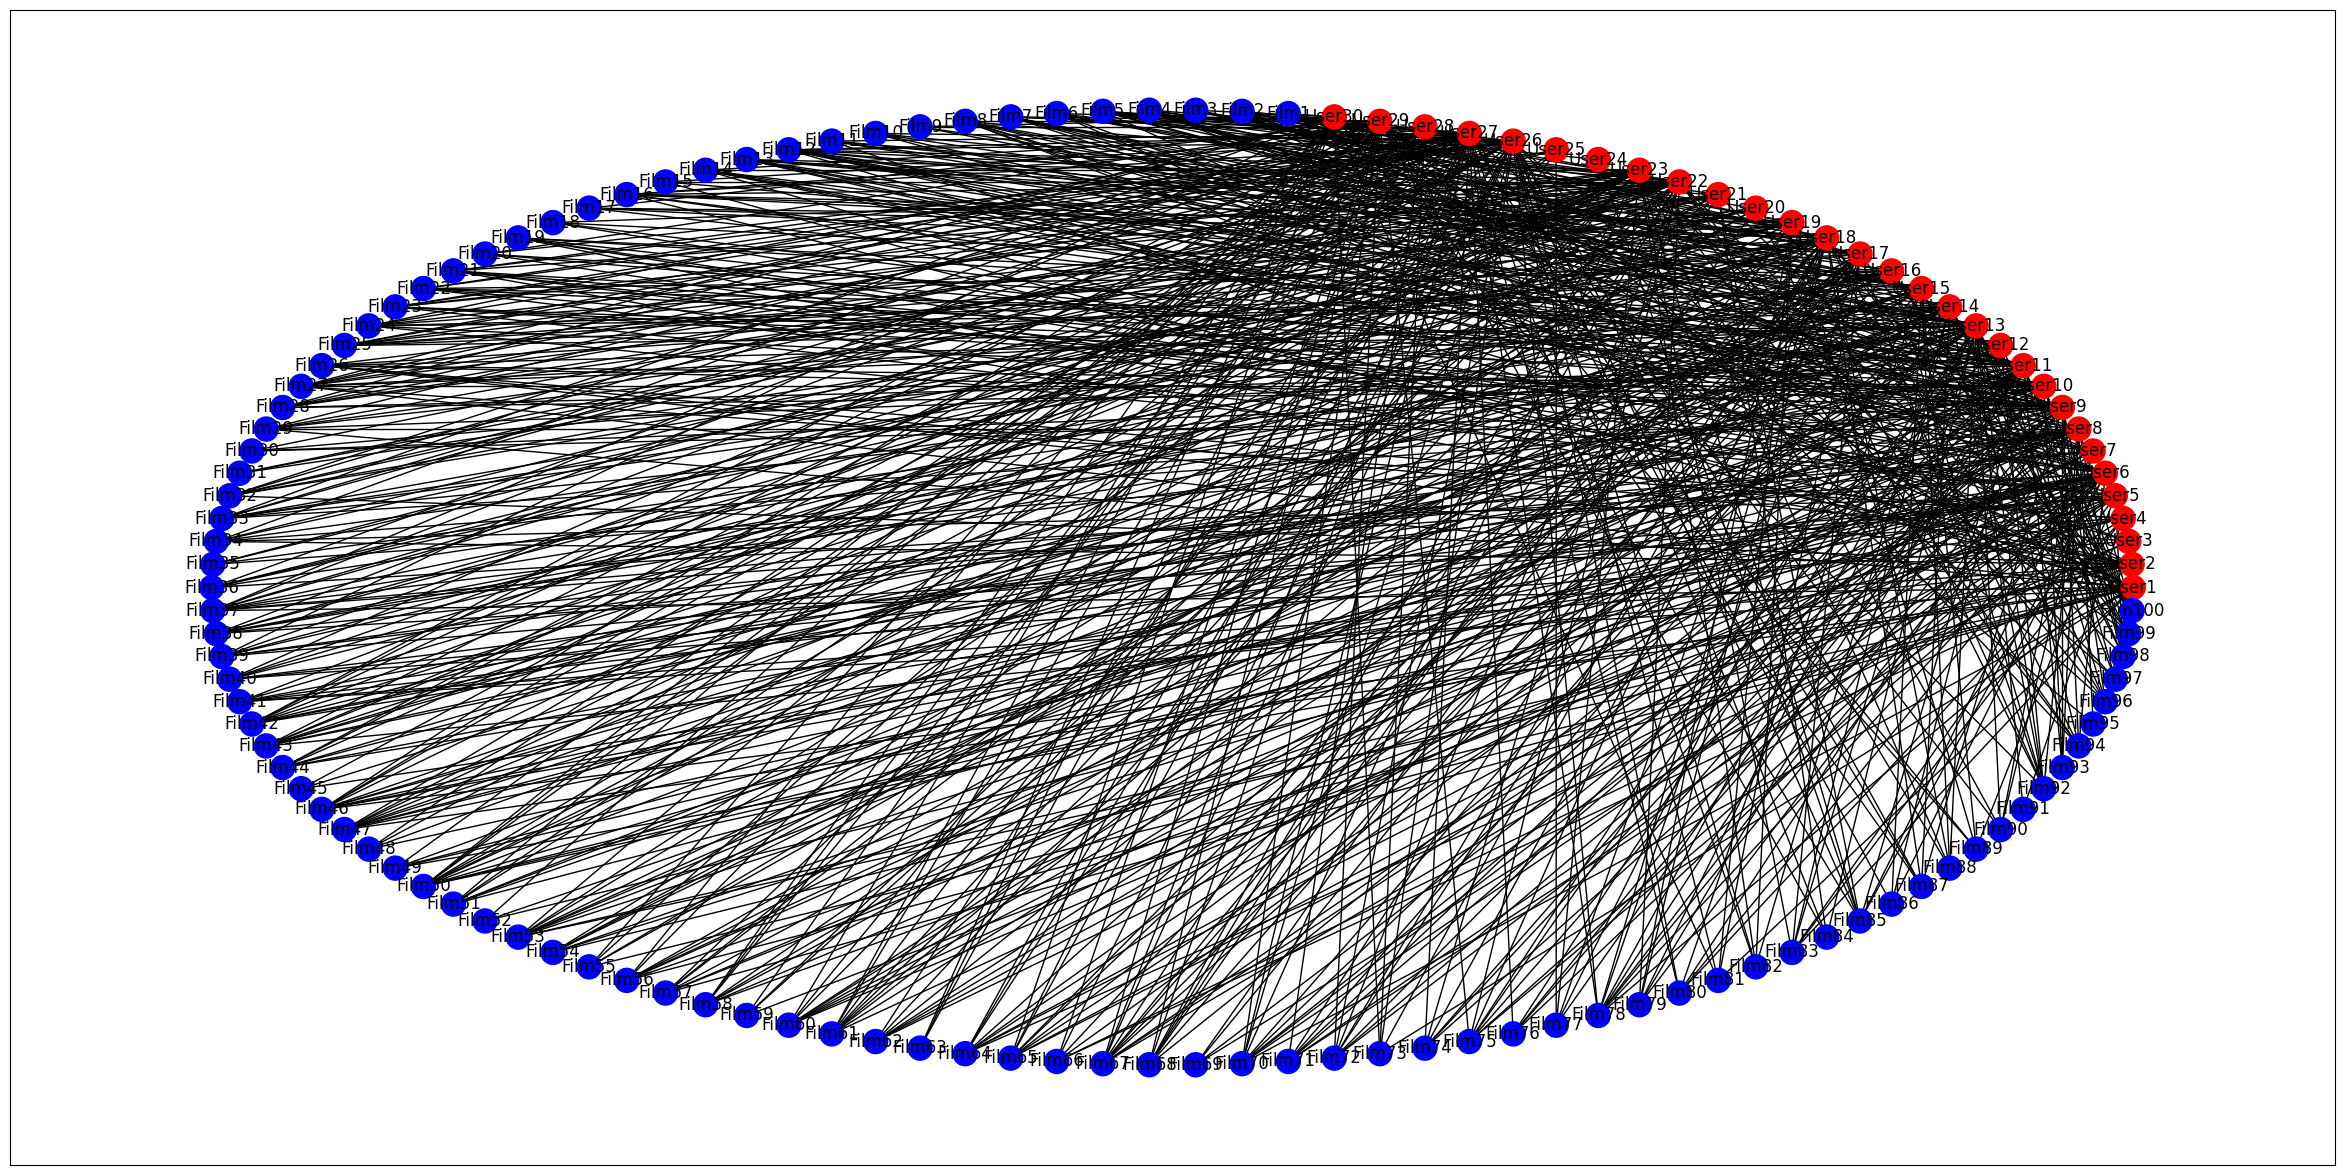

In [ ]:
plt.figure(figsize=(30, 15))
node_color = ['red' if G.nodes[n]['node_type'] == 'user' else 'blue' for n in G.nodes()]
nx.draw_networkx(G, pos=nx.spring_layout(G), node_color=node_color)
plt.show()

In [ ]:
knowledge_graph = {}

for user, info in users.items():
    age = info['age']
    gender = info['gender']
    preferred_genres = []
    if age >= 30 and gender == 'male':
        preferred_genres = ['action', 'thriller', 'sci-fi']
    elif age >= 30 and gender == 'female':
        preferred_genres = ['drama', 'romance', 'mystery']

    else:
        preferred_genres = ['comedy', 'fantasy', 'animation']

    connected_films = [film for film, film_info in films.items() if film_info['genre'] in preferred_genres]
    knowledge_graph[user] = connected_films

for film in films:
    knowledge_graph[film] = []

In [ ]:
class KnowledgeGraphFactorization:
    def __init__(self, knowledge_graph, k, learning_rate=0.01, num_iterations=1000):
        self.knowledge_graph = knowledge_graph
        self.k = k
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.adjacency_matrix, self.node_names = self.build_adjacency_matrix()

    def build_adjacency_matrix(self):
        nodes = list(self.knowledge_graph.keys())
        n = len(nodes)
        adjacency_matrix = np.zeros((n, n))
        for i, node1 in enumerate(nodes):
            for j, node2 in enumerate(nodes):
                if node2 in self.knowledge_graph[node1]:
                    adjacency_matrix[i, j] = 1
        return adjacency_matrix, nodes

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def matrix_factorization(self):
        A = self.adjacency_matrix
        m, n = A.shape
        U = np.random.rand(m, self.k) * 0.01
        V = np.random.rand(n, self.k) * 0.01

        for _ in range(self.num_iterations):
            U_grad = np.zeros_like(U)
            V_grad = np.zeros_like(V)

            for i in range(m):
                for j in range(n):
                    error = self.sigmoid(A[i, j] - np.dot(U[i], V[j]))
                    U_grad[i] += (A[i, j] - error) * V[j]
                    V_grad[j] += (A[i, j] - error) * U[i]

            U -= self.learning_rate * U_grad
            V -= self.learning_rate * V_grad

        self.U = U
        self.V = V

    def get_node_vectors(self):
        return self.U

    def print_node_vectors(self):
        for i, node_vector in enumerate(self.U):
            print(f"{self.node_names[i]}: {node_vector}")

In [ ]:
kgf = KnowledgeGraphFactorization(knowledge_graph, k=10)
kgf.matrix_factorization()
kgf.print_node_vectors()


User1: [ 1.50112204 -3.09740533  0.55129793  2.93811379 -0.02056119 -0.70945987
 -0.25442781  0.5115375   1.24548134  2.44289132]
User2: [ 0.18196444  1.37186756  3.90213289 -0.14689218 -0.39577804 -0.33434358
  1.97410708  0.96226998  0.24484839 -1.04238066]
User3: [ 0.63707196  2.08471299 -2.68244181  0.11688084  1.99455933  2.31385018
 -0.06137604  0.34601525  0.56317768  1.28791166]
User4: [ 0.17487523  1.36686128  3.9034677  -0.1486951  -0.39209698 -0.32983702
  1.9739781   0.96570948  0.24716572 -1.04353004]
User5: [ 0.63278756  2.08257221 -2.68176366  0.12183764  1.99675043  2.31533125
 -0.06918959  0.3487678   0.56552989  1.28878554]
User6: [ 1.50374725 -3.09680865  0.54972431  2.9414927  -0.02020668 -0.71060761
 -0.25090856  0.50985005  1.2400882   2.44172139]
User7: [ 0.18188609  1.36699896  3.90316188 -0.14677854 -0.39683572 -0.33461061
  1.97362677  0.96776266  0.2460748  -1.04284091]
User8: [ 0.63281443  2.08170898 -2.6832979   0.11720584  1.9953265   2.31530503
 -0.060079

In [ ]:
def cosine_similarity(u, v):
    dot_product = np.dot(u, v)
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    return dot_product / (norm_u * norm_v)

def recommend_users(target_user_idx, U, V, node_names):
    target_user_vector = U[target_user_idx]
    similarities = [cosine_similarity(target_user_vector, v) for v in V]
    sorted_indices = np.argsort(similarities)[::-1]

    recommended_users = []
    for idx in sorted_indices:
        if idx != target_user_idx:
            recommended_users.append(node_names[idx])
        if len(recommended_users) >= 5:
            break

    return recommended_users

target_user_idx = 0
recommended_users = recommend_users(target_user_idx, kgf.U, kgf.V, kgf.node_names)
print(f"Рекомендованные фильмы для {kgf.node_names[target_user_idx]}: {', '.join(recommended_users)}")

Рекомендованные фильмы для User1: Film80, Film25, Film78, Film14, Film39


In [ ]:

class RandomWalkEmbedding:
    def __init__(self, graph, embedding_dim=100, walk_length=10, num_walks=10, window_size=5, seed=42):
        self.graph = graph
        self.embedding_dim = embedding_dim
        self.walk_length = walk_length
        self.num_walks = num_walks
        self.window_size = window_size
        self.seed = seed
        random.seed(seed)

    def generate_random_walks(self):
        walks = []
        nodes = list(self.graph.keys())

        for _ in range(self.num_walks):
            for node in nodes:
                walk = [node]
                current_node = node

                for _ in range(self.walk_length - 1):
                    neighbors = self.graph[current_node]
                    if len(neighbors) > 0:
                        current_node = random.choice(neighbors)
                    walk.append(current_node)

                walks.append(walk)

        return walks

    def train_embeddings(self, walks):
        node_vocab = list(set([node for walk in walks for node in walk]))
        node_to_index = {node: index for index, node in enumerate(node_vocab)}
        index_to_node = {index: node for node, index in node_to_index.items()}

        embeddings = np.random.rand(len(node_vocab), self.embedding_dim)
        context_weights = np.zeros((len(node_vocab), self.embedding_dim))

        for walk in walks:
            for i in range(len(walk)):
                center_node = walk[i]
                context_nodes = walk[max(0, i - self.window_size):i] + walk[i + 1:i + self.window_size + 1]

                center_index = node_to_index[center_node]
                context_indices = [node_to_index[node] for node in context_nodes]

                center_embedding = embeddings[center_index]
                for context_index in context_indices:
                    context_weights[context_index] += center_embedding

        return embeddings, index_to_node

    def fit(self):
        walks = self.generate_random_walks()
        embeddings, index_to_node = self.train_embeddings(walks)
        return embeddings, index_to_node

In [ ]:
embedder = RandomWalkEmbedding(knowledge_graph, embedding_dim=100, walk_length=10, num_walks=10, window_size=2, seed=42)
embeddings, index_to_node = embedder.fit()


for index, node in index_to_node.items():
    print(f"{node}: {embeddings[index]}")

Film18: [2.27910071e-01 3.09539581e-02 5.48513928e-01 8.49998542e-01
 7.55238441e-01 1.38915705e-01 9.79519728e-02 5.63918686e-01
 4.72661758e-01 3.31468838e-01 2.57140469e-02 6.45664447e-01
 6.89441700e-02 3.06762767e-01 3.33635327e-02 7.49928195e-01
 3.88120328e-01 3.44222606e-02 9.93049618e-01 5.71820915e-01
 5.45722924e-01 2.30857068e-01 3.10497485e-01 7.38679805e-01
 6.49320161e-01 9.14344959e-01 4.29930411e-01 5.74690870e-01
 9.39590019e-01 6.55822493e-01 8.08730352e-01 4.79257814e-01
 1.15036584e-01 7.79341204e-01 9.47340055e-01 2.30681284e-01
 1.09426607e-01 8.67221122e-04 8.35368185e-01 5.44990659e-01
 7.81343963e-01 7.89155730e-01 1.38319624e-01 1.25543186e-01
 5.65855637e-01 1.86854287e-01 7.80138814e-01 3.68557113e-01
 8.65054944e-01 6.52464308e-01 2.50061340e-01 6.37395592e-01
 3.54888850e-01 2.95166424e-01 3.11320469e-01 6.99527046e-01
 9.03739008e-01 1.08743685e-02 9.00491023e-01 5.42839293e-01
 5.43320605e-01 1.49132672e-03 3.95982952e-01 7.95811322e-02
 5.21185395e-01 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data, DataLoader

class GCNEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCNEncoder, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

nodes = ['Физика', 'Биология', 'Химия', 'Математика', 'Информатика', 'Астрономия']
edges = [
    ('Физика', 'Биология'), ('Физика', 'Химия'),
    ('Биология', 'Физика'), ('Биология', 'Математика'), ('Биология', 'Информатика'),
    ('Химия', 'Физика'), ('Химия', 'Информатика'),
    ('Математика', 'Биология'), ('Математика', 'Информатика'), ('Математика', 'Астрономия'),
    ('Информатика', 'Биология'), ('Информатика', 'Химия'), ('Информатика', 'Математика'),
    ('Астрономия', 'Математика')
]

node_to_idx = {node: idx for idx, node in enumerate(nodes)}
edges_idx = [[node_to_idx[source], node_to_idx[target]] for source, target in edges]
edges_idx = torch.tensor(edges_idx, dtype=torch.long).t().contiguous()

x = torch.eye(len(nodes))  #

data = Data(x=x, edge_index=edges_idx)


model = GCNEncoder(input_dim=len(nodes), hidden_dim=64, output_dim=32)
loader = DataLoader([data], batch_size=1, shuffle=True)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    for data in loader:
        optimizer.zero_grad()
        output = model(data)
        loss = torch.mean(output ** 2)
        loss.backward()
        optimizer.step()


with torch.no_grad():
    output = model(data)
    node_embeddings = {nodes[idx]: output[idx].tolist() for idx in range(len(nodes))}

# Вывод векторных представлений
for node, embedding in node_embeddings.items():
    print(f"{node}: {embedding}")

/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Физика: [0.00016682688146829605, 0.0001977630890905857, -0.00040992803405970335, 0.0008217636495828629, -0.0005172742530703545, -5.2041723392903805e-05, -0.0003401007270440459, -0.0010370160453021526, -0.0005960140842944384, 0.0006250395672395825, 7.816764991730452e-05, -0.00015214993618428707, 0.0004114037146791816, -6.5559870563447475e-06, -0.00028803106397390366, 0.00033535290276631713, -7.081031799316406e-05, 0.0004986781277693808, 0.0007694085943512619, 0.0005954719381406903, -0.00012734514893963933, -0.000655021402053535, 2.5187619030475616e-06, -0.0004265676252543926, 5.067349411547184e-05, -7.754270336590707e-05, 0.001191906165331602, -0.0007866797968745232, 0.001307202153839171, 0.00027183815836906433, 0.00012455694377422333, -0.00013836805010214448]
Биология: [0.00028004974592477083, -0.0002270885743200779, 0.0005567821208387613, 0.0007748364005237818, 0.0013707730686292052, -0.00022908661048859358, -7.040018681436777e-05, 0.0010801958851516247, -0.000361086567863822, -0.0015